In [ ]:
!pip install gtfparse


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gtfparse import read_gtf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
counts = pd.read_csv("/content/drive/MyDrive/TCGA-SKCM-counts-full.txt", sep = '\t', na_values='?')
counts

,gene_id,gene_name,gene_type,TCGA-GN-A263,TCGA-EB-A551,TCGA-D3-A5GT,TCGA-EB-A24C,TCGA-EB-A3XF,TCGA-BF-AAP8,TCGA-EB-A299,...,TCGA-BF-AAOU,TCGA-WE-A8K4,TCGA-BF-A3DL,TCGA-FR-A728,TCGA-EB-A42Z,TCGA-BF-A5ES,TCGA-ER-A19K,TCGA-GN-A26C,TCGA-EB-A5SE,TCGA-D9-A4Z2
0,ENSG00000000003.15,TSPAN6,protein_coding,1711,1119,748,3315,2275,1133,2073,...,1238,1281,1805,2196,2380,837,2285,1288,3493,4400
1,ENSG00000000005.6,TNMD,protein_coding,0,0,0,0,1,0,0,...,0,0,0,2,1,1,1,2,0,0
2,ENSG00000000419.13,DPM1,protein_coding,1819,1900,846,1851,1514,1066,1356,...,1358,1709,609,1173,1765,821,1760,1961,1133,2028
3,ENSG00000000457.14,SCYL3,protein_coding,316,580,469,1235,650,471,711,...,401,497,251,400,607,291,515,533,1132,925
4,ENSG00000000460.17,C1orf112,protein_coding,279,292,216,608,346,104,204,...,255,490,247,360,559,283,771,408,658,787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60655,ENSG00000288669.1,AC008763.4,protein_coding,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
60656,ENSG00000288670.1,AL592295.6,lncRNA,204,313,272,345,152,368,153,...,264,264,148,217,297,71,220,284,415,304
60657,ENSG00000288671.1,AC006486.3,protein_coding,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60658,ENSG00000288674.1,AL391628.1,protein_coding,7,19,15,6,1,5,10,...,11,18,2,12,5,1,1,1,5,24


In [ ]:
gtf = pd.read_csv('/content/drive/MyDrive/gencode.v47.basic.annotation.gtf', sep = '\t', comment = "#", header=None,
                  names=["chr", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"])  # либо .to_dict()

In [ ]:
gtf

,chr,source,feature,start,end,score,strand,frame,attribute
0,chr1,HAVANA,gene,11121,24894,.,+,.,"gene_id ""ENSG00000290825.2""; gene_type ""lncRNA..."
1,chr1,HAVANA,transcript,11426,14409,.,+,.,"gene_id ""ENSG00000290825.2""; transcript_id ""EN..."
2,chr1,HAVANA,exon,11426,11671,.,+,.,"gene_id ""ENSG00000290825.2""; transcript_id ""EN..."
3,chr1,HAVANA,exon,12010,12227,.,+,.,"gene_id ""ENSG00000290825.2""; transcript_id ""EN..."
4,chr1,HAVANA,exon,12613,12721,.,+,.,"gene_id ""ENSG00000290825.2""; transcript_id ""EN..."
...,...,...,...,...,...,...,...,...,...
2225573,chrM,ENSEMBL,transcript,15888,15953,.,+,.,"gene_id ""ENSG00000210195.2""; transcript_id ""EN..."
2225574,chrM,ENSEMBL,exon,15888,15953,.,+,.,"gene_id ""ENSG00000210195.2""; transcript_id ""EN..."
2225575,chrM,ENSEMBL,gene,15956,16023,.,-,.,"gene_id ""ENSG00000210196.2""; gene_type ""Mt_tRN..."
2225576,chrM,ENSEMBL,transcript,15956,16023,.,-,.,"gene_id ""ENSG00000210196.2""; transcript_id ""EN..."


In [ ]:
def extract_gene_info(attr):
    attr_dict = {}
    for item in attr.split(';'):
        if item.strip():
            key, value = item.strip().split(' ')
            attr_dict[key] = value.strip('"')
    return attr_dict

# Применяем функцию к столбцу attribute
gtf['attributes_dict'] = gtf['attribute'].apply(extract_gene_info)
gtf['gene_id'] = gtf['attributes_dict'].apply(lambda x: x.get('gene_id', ''))
gtf['gene_type'] = gtf['attributes_dict'].apply(lambda x: x.get('gene_type', ''))

In [ ]:
protein_coding_genes = gtf[gtf['gene_type'] == 'protein_coding']
gene_lengths = protein_coding_genes.groupby('gene_id').agg({
    'start': 'min',
    'end': 'max'
}).reset_index()
gene_lengths['length'] = gene_lengths['end'] - gene_lengths['start']

In [ ]:
gene_id_column = counts.columns[0]
gene_lengths['gene_id_no_version'] = gene_lengths['gene_id'].apply(lambda x: x.split('.')[0])
# Удаляем версии из идентификаторов генов в данных экспрессии
counts['gene_id_no_version'] = counts[gene_id_column].apply(lambda x: x.split('.')[0] if isinstance(x, str) and '.' in x else x)
protein_coding_counts = counts[counts['gene_id_no_version'].isin(gene_lengths['gene_id_no_version'])].copy()


In [ ]:
numeric_columns = [col for col in protein_coding_counts.columns if col not in ['gene_id', 'gene_name', 'gene_type', 'gene_id_no_version']]
# Преобразуем эти столбцы в числовой формат
for col in numeric_columns:
    protein_coding_counts.loc[:, col] = pd.to_numeric(protein_coding_counts[col], errors='coerce')

In [ ]:
from re import L
# === Шаг 3: TPM-нормализация ===
# Функция для TPM
def tpm_normalize(counts, lengths_kb):
    lengths = gene_lengths.set_index('gene_id_no_version')['length']
    lengths = lengths.loc[counts['gene_id_no_version']]
    numeric_data = counts[numeric_columns]
    rpk = numeric_data.divide(lengths.values, axis=0)* 1000
    scaling_factors = rpk.sum(axis=1) / 1e6
    return rpk.div(scaling_factors, axis=0)

tpm = tpm_normalize(protein_coding_counts, gene_lengths)

# log2(TPM + 1)
tpm_log2 = np.log2(tpm + 1)


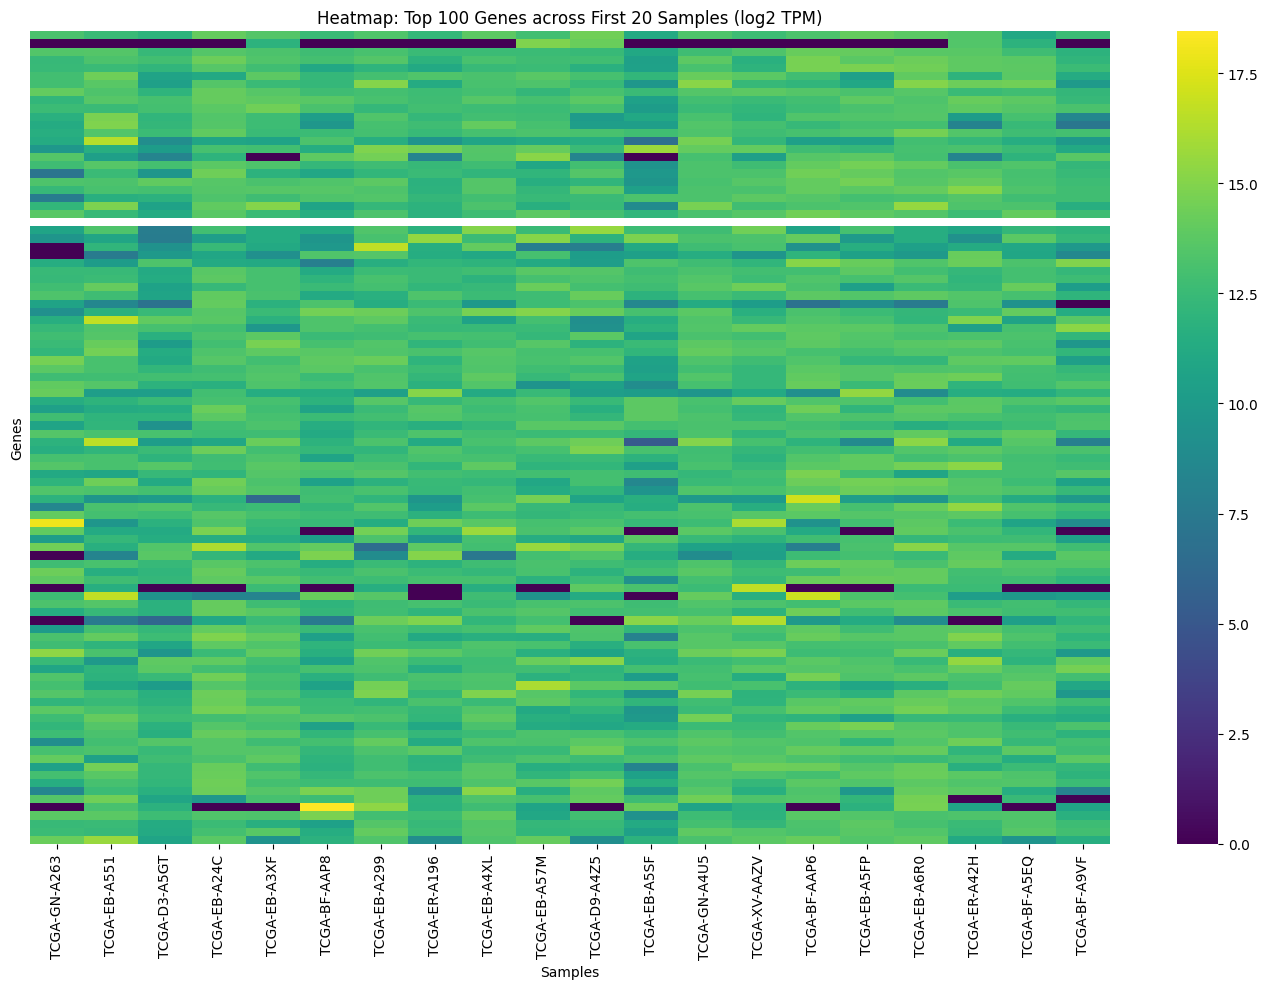

In [ ]:
# === Шаг 4: Тепловая карта ===
# Возьмём первые 100 генов и 20 образцов
subset = tpm_log2.iloc[:100, :20]

plt.figure(figsize=(14, 10))
sns.heatmap(subset, cmap="viridis", xticklabels=True, yticklabels=False)
plt.title("Heatmap: Top 100 Genes across First 20 Samples (log2 TPM)")
plt.xlabel("Samples")
plt.ylabel("Genes")
plt.tight_layout()
plt.show()